In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
diabetes_datasets = load_diabetes()
print(diabetes_datasets['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [3]:
# Save the input and target variables
data = diabetes_datasets['data']
targets = diabetes_datasets['target']

print(diabetes_datasets.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [4]:
# Normalise the target data (this will make clearer training curves)

targets = (targets - targets.mean(axis=0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [5]:
# Split the data into train and test sets

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [6]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    
    return model

In [9]:
# Print the model summary

model = get_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [10]:
# Compile the model

model.compile(
    optimizer='adam',
    loss = 'mse',
    metrics = ['mae']
)

In [11]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 [==============================] - 2s 5ms/sample - loss: 0.9859 - mae: 0.8470 - val_loss: 0.8849 - val_mae: 0.7911
Epoch 2/100
337/337 [==============================] - 0s 343us/sample - loss: 0.8765 - mae: 0.8001 - val_loss: 0.6521 - val_mae: 0.6644
Epoch 3/100
337/337 [==============================] - 0s 589us/sample - loss: 0.6401 - mae: 0.6752 - val_loss: 0.4196 - val_mae: 0.5081
Epoch 4/100
337/337 [==============================] - 0s 592us/sample - loss: 0.5617 - mae: 0.6046 - val_loss: 0.3762 - val_mae: 0.4886
Epoch 5/100
337/337 [==============================] - 0s 343us/sample - loss: 0.4975 - mae: 0.5736 - val_loss: 0.3828 - val_mae: 0.4854
Epoch 6/100
337/337 [==============================] - 0s 586us/sample - loss: 0.5005 - mae: 0.5730 - val_loss: 0.3866 - val_mae: 0.4750
Epoch 7/100
337/337 [==============================] - 0s 584us/sample - loss: 0.5160 - mae: 0.5735 - val_loss: 0.3808 - val_mae: 0.502

In [22]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.7400 - mae: 0.5432


[0.5926999873585171, 0.54323477]

#### Plot the learning curves

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

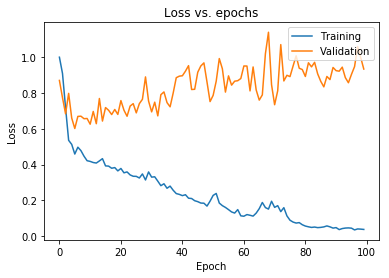

In [24]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [7]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [8]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [14]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(0.01, 0.05)

In [15]:
# Compile the model

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [34]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 [==============================] - 2s 6ms/sample - loss: 7.3187 - mae: 0.8544 - val_loss: 6.7357 - val_mae: 0.8127
Epoch 2/100
337/337 [==============================] - 0s 549us/sample - loss: 6.5924 - mae: 0.8457 - val_loss: 6.0557 - val_mae: 0.8085
Epoch 3/100
337/337 [==============================] - 0s 594us/sample - loss: 5.9270 - mae: 0.8404 - val_loss: 5.4366 - val_mae: 0.8011
Epoch 4/100
337/337 [==============================] - 0s 593us/sample - loss: 5.3182 - mae: 0.8230 - val_loss: 4.8773 - val_mae: 0.7897
Epoch 5/100
337/337 [==============================] - 0s 592us/sample - loss: 4.7647 - mae: 0.8095 - val_loss: 4.3770 - val_mae: 0.7751
Epoch 6/100
337/337 [==============================] - 0s 593us/sample - loss: 4.2352 - mae: 0.7654 - val_loss: 3.9005 - val_mae: 0.7364
Epoch 7/100
337/337 [==============================] - 0s 581us/sample - loss: 3.7428 - mae: 0.7081 - val_loss: 3.5114 - val_mae: 0.707

In [35]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.7943 - mae: 0.4928


[0.6286038743125067, 0.4927899]

#### Plot the learning curves

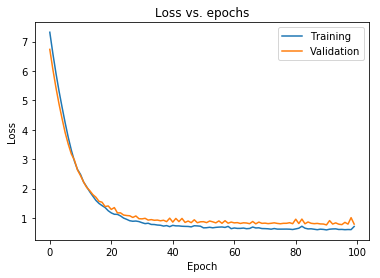

In [36]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [27]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class PredictingCallback(Callback):
    
    def on_Predicting_begin(self, logs=None):
        print('Starting prediction')
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f'Starting epoch {epoch}')
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f'Predicting: Starting batch {batch}')
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f'Predicting: Finished batch {batch}')
        
    def on_epoch_end(self, epoch, logs=None):
        print(f'Finished epoch {epoch}')
        
    def on_Predicting_begin(self, logs=None):
        print(f'Finished Predicting')

In [19]:
# Re-build the model

model = get_regularised_model(0.01, 0.3)


In [20]:
# Compile the model

model.compile(
    optimizer = 'adam',
    loss = 'mae'
)



#### Train the model with the callback

In [22]:
# Train the model, with some of the data reserved for validation

model.fit(train_data, train_targets, epochs=3, validation_split=0.15, batch_size=128, callbacks=[TrainingCallback()])

Train on 337 samples, validate on 60 samples
Starting epoch 0
Epoch 1/3
Training: Starting batch 0
Training: Finished batch 0
128/337 [==========>...................] - ETA: 2s - loss: 7.5394Training: Starting batch 1
Training: Finished batch 1
256/337 [=====================>........] - ETA: 0s - loss: 7.4182Training: Starting batch 2
Training: Finished batch 2
Finished epoch 0
337/337 [==============================] - 2s 6ms/sample - loss: 7.3481 - val_loss: 7.0568
Starting epoch 1
Epoch 2/3
Training: Starting batch 0
Training: Finished batch 0
128/337 [==========>...................] - ETA: 0s - loss: 7.1132Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Finished epoch 1
337/337 [==============================] - 0s 528us/sample - loss: 6.9731 - val_loss: 6.6984
Starting epoch 2
Epoch 3/3
Training: Starting batch 0
Training: Finished batch 0
128/337 [==========>...................] - ETA: 0s - loss: 6.7617Training: Starting

In [26]:
# Evaluate the model

model.evaluate(test_data, test_targets, verbose=2, callbacks=[TestingCallback()])

Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
45/1 - 0s - loss: 6.4234


6.371778064303928

In [28]:
# Make predictions with the model

model.predict(test_data, callbacks=[PredictingCallback()])

Predicting: Starting batch 0
Predicting: Finished batch 0
Predicting: Starting batch 1
Predicting: Finished batch 1


array([[-0.05735648],
       [-0.06478266],
       [-0.05660513],
       [-0.06516009],
       [-0.06112861],
       [-0.06228274],
       [-0.05981408],
       [-0.0573003 ],
       [-0.06094019],
       [-0.05901727],
       [-0.05704916],
       [-0.06462457],
       [-0.06043732],
       [-0.06176817],
       [-0.05556827],
       [-0.05684523],
       [-0.05789704],
       [-0.06124615],
       [-0.05883774],
       [-0.06055754],
       [-0.06594851],
       [-0.05482864],
       [-0.06031634],
       [-0.06065655],
       [-0.05795221],
       [-0.05466734],
       [-0.0594897 ],
       [-0.05547149],
       [-0.0626068 ],
       [-0.0586713 ],
       [-0.05752443],
       [-0.05547554],
       [-0.06112152],
       [-0.06092197],
       [-0.06372263],
       [-0.06105439],
       [-0.05760043],
       [-0.05522158],
       [-0.05634446],
       [-0.06469889],
       [-0.05744654],
       [-0.05608017],
       [-0.06394368],
       [-0.06629498],
       [-0.0569166 ]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [23]:
# Re-train the unregularised model

unreg_model = get_model()
unreg_model.compile(optimizer='adam', loss='mse')
unreg_history = unreg_model.fit(train_data, train_targets, validation_split=0.15, batch_size=64, epochs=100, 
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)], verbose=False)

In [24]:
# Evaluate the model on the test set

unreg_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.6283


0.8474695199065738

In [25]:
# Re-train the regularised model

reg_model = get_regularised_model(1e-8, 0.05)
reg_model.compile(optimizer='adam', loss='mse')
reg_history = reg_model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, 
              callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)], verbose=False)

In [26]:
# Evaluate the model on the test set

reg_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.4893


0.6441435992717743

#### Plot the learning curves

In [ ]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('unreg_model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('reg_model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()